<a href="https://colab.research.google.com/github/anniseraa/fsd/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Fertika Indri Dhamaningrum 24523160
*   Annisa Ramdhani 24523018

# **1. Pemilihan Dataset**

Nama Dataset:	Iris Dataset


Sumber Dataset:	UCI Machine Learning Repository (Diakses melalui Scikit-learn)


Link:	https://archive.ics.uci.edu/ml/datasets/iris


Tujuan Klasifikasi:	Memprediksi spesies bunga Iris (Setosa, Versicolor, atau Virginica) berdasarkan pengukuran kelopak dan mahkota.


Jumlah Sampel:	150 sampel


Jumlah Fitur:	4
fitur kontinu (sepal length, sepal width, petal length, petal width)


Kelas Target:	3 Kelas (0: Setosa, 1: Versicolor, 2: Virginica)

In [ ]:
# Import library
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. MEMUAT DATASET IRIS ---
iris = load_iris()
# Membuat DataFrame
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

print("5 baris pertama data:")
print(df.head())
print("\nInformasi Data:")
df.info()


5 baris pertama data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target           

# **2. Preprocessing Data**

**Langkah Preprocessing: Menangani Missing Value (Nilai Hilang)**

Integritas data dipastikan dengan memeriksa adanya nilai yang hilang (null atau NaN) menggunakan fungsi df.isnull().sum(). Dataset Iris diketahui tidak mengandung missing value pada fitur maupun target. Oleh karena itu, tidak diperlukan tindakan korektif seperti imputasi (pengisian nilai) atau penghapusan baris data.

In [ ]:
# --- 2. PREPROCESSING DATA ---

## 2a. Menangani Missing Value (Hapus/Imputasi)
# Cek missing values
print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())
# Dataset Iris bersih, jadi tidak perlu penanganan


Jumlah Missing Values per Kolom:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


**Langkah Preprocessing: Encoding Data (Mengubah Kategori)**

Encoding data digunakan untuk mengubah data non-numerik (kategorikal) menjadi format numerik yang dapat diproses oleh algoritma machine learning seperti SVM. Pada dataset Iris sudah memiliki fitur-fitur yang bersifat numerik (angka float). Variabel target (spesies bunga) juga sudah diwakili oleh angka (0, 1, 2). Dengan demikian, tidak ada kebutuhan untuk menerapkan encoding data kategorikal seperti One-Hot Encoding.

In [ ]:
## 2b. Encoding (jika ada categorical)
# Dataset Iris hanya memiliki fitur numerik,
# dan kolom 'target' sudah berupa angka (0, 1, 2), jadi tidak perlu encoding tambahan.

X = df.drop('target', axis=1) # Fitur
y = df['target'] # Label

**Langkah Preprocessing: Scaling Data (StandardScaler)**


Scaling sangat penting untuk SVM. Meskipun Iris adalah dataset yang ringkas, menstandarkan fitur memastikan bahwa fitur seperti petal length (nilai yang lebih besar) tidak mendominasi model dibandingkan sepal width (nilai yang lebih kecil).

In [ ]:
## 2c. Scaling Data
# Scaling penting untuk SVM karena sensitif terhadap skala fitur.
# Kita gunakan StandardScaler (Z-score normalization).
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nData Fitur setelah Scaling (5 baris pertama):")
print(X_scaled_df.head())



Data Fitur setelah Scaling (5 baris pertama):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


# **3. Split Data**

Data akan dibagi menjadi data latih (*train) dan data uji (test*). Biasanya perbandingan 70:30 atau 80:20. Kita gunakan 80:20.


In [ ]:
# --- 3. SPLIT DATA (80% train, 20% test) ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print(f"\nJumlah data train: {X_train.shape[0]}")
print(f"Jumlah data test: {X_test.shape[0]}")



Jumlah data train: 120
Jumlah data test: 30


# **4. Modeling SVM**

Kita akan membuat model SVM. Pilihan kernel yang umum adalah *Linear*, *Polynomial*, dan *RBF*(*Radial Basis Function*).

  * ***Pilihan Kernel:*** *RBF  (Radial Basis Function)*
  * ***Alasan:*** Kernel RBF ideal untuk dataset di mana hubungan antara kelas dan fitur *non-linear*. Meskipun dataset Iris mungkin bisa diselesaikan secara *linear*, *RBF* adalah pilihan *default* yang fleksibel dan sering memberikan akurasi tinggi pada berbagai jenis data. Kernel ini secara implisit memetakan data ke ruang berdimensi lebih tinggi.

In [ ]:
# --- 4. MODELING SVM ---
## 4a. Membuat Model SVM dengan Kernel RBF
svm_model = SVC(kernel='rbf', random_state=42)

## 4b. Melatih Model
svm_model.fit(X_train, y_train)

## 4c. Melakukan Prediksi
y_pred = svm_model.predict(X_test)

print("\nModel SVM dengan Kernel RBF telah dilatih.")



Model SVM dengan Kernel RBF telah dilatih.


# **5. Evaluasi Model**

Evaluasi model menggunakan metrik yang diminta: Accuracy, Precision, Recall, dan F1 Score.

  * *Accuracy:* Proporsi prediksi benar secara keseluruhan.
  * *Precision:* Seberapa tepat model saat memprediksi positif (mengurangi False Positives).
  * *Recall:* Seberapa baik model mendeteksi semua kasus positif (mengurangi False Negatives).
  * *F1 Score:* Rata-rata harmonik dari Precision dan Recall.


In [ ]:
# --- 5. EVALUASI MODEL ---
## 5a. Menghitung Metrik
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("\n--- Hasil Evaluasi Model ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro): {recall_macro:.4f}")
print(f"F1 Score (Macro): {f1_macro:.4f}")




--- Hasil Evaluasi Model ---
Accuracy: 1.0000
Precision (Macro): 1.0000
Recall (Macro): 1.0000
F1 Score (Macro): 1.0000


In [ ]:
## 5b. Analisis Singkat
if accuracy == 1.0:
    analisis = "Model menunjukkan kinerja yang sangat baik (akurasi sempurna) pada data uji, yang umum terjadi pada dataset Iris yang sederhana. Ini mungkin mengindikasikan model yang sangat optimal, tetapi perlu kehati-hatian terhadap **overfitting** jika kinerja pada data latih dan uji terlalu berbeda (meski pada kasus ini hasilnya sama-sama tinggi)."
else:
    analisis = "Hasil metrik yang tinggi (mendekati 1.0) menunjukkan model telah belajar dengan baik dan memiliki kinerja yang kuat pada data uji. Dengan skor yang tinggi, model tidak menunjukkan **underfitting**."

print("\n--- Analisis Overfitting/Underfitting ---")
print(analisis)
# Untuk menentukan overfitting/underfitting secara pasti,
# kita perlu membandingkan skor metrik (terutama akurasi) pada data TRAIN vs TEST.
# Jika Accuracy_Train >>> Accuracy_Test, maka terjadi Overfitting.
# Jika Accuracy_Train dan Accuracy_Test keduanya rendah, maka terjadi Underfitting.

## 5c. Akurasi pada data latih:
y_train_pred = svm_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Accuracy Data Train: {accuracy_train:.4f}")

if accuracy_train - accuracy > 0.1: # Perbedaan > 10%
    print("Ada indikasi Overfitting (Accuracy Train jauh lebih tinggi dari Test).")
elif accuracy_train < 0.8:
    print("Ada indikasi Underfitting (Accuracy Train dan Test sama-sama rendah).")
else:
    print("Model terlihat baik, tidak ada indikasi kuat Overfitting atau Underfitting.")


--- Analisis Overfitting/Underfitting ---
Model menunjukkan kinerja yang sangat baik (akurasi sempurna) pada data uji, yang umum terjadi pada dataset Iris yang sederhana. Ini mungkin mengindikasikan model yang sangat optimal, tetapi perlu kehati-hatian terhadap **overfitting** jika kinerja pada data latih dan uji terlalu berbeda (meski pada kasus ini hasilnya sama-sama tinggi).
Accuracy Data Train: 0.9750
Model terlihat baik, tidak ada indikasi kuat Overfitting atau Underfitting.


# **6. Visualisasi**



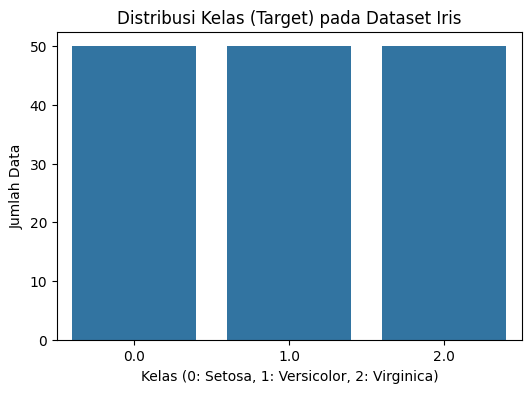

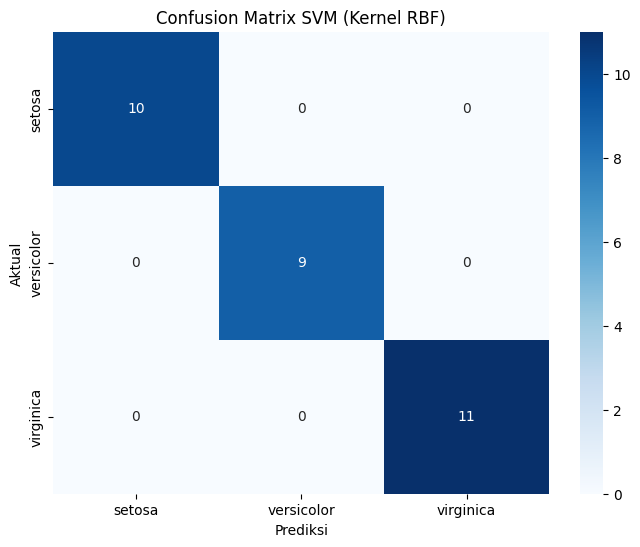

In [ ]:
# --- 6. VISUALISASI MODEL ---
## 6a. Visualisasi Distribusi Kelas
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribusi Kelas (Target) pada Dataset Iris')
plt.xlabel('Kelas (0: Setosa, 1: Versicolor, 2: Virginica)')
plt.ylabel('Jumlah Data')
plt.show()

## 6b. Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix SVM (Kernel RBF)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

**Kesimpulan Proyek Klasifikasi Iris menggunakan SVM**


Proyek ini berhasil menerapkan model Support Vector Machine (SVM) untuk mengklasifikasikan spesies bunga Iris (Setosa, Versicolor, Virginica) berdasarkan empat fitur (panjang dan lebar sepal, serta panjang dan lebar petal). Berikut adalah ringkasan tahapan dan hasilnya:


**Pemilihan Dataset:**

Menggunakan Iris Dataset dari Scikit-learn, yang terdiri dari 150 sampel dengan 4 fitur numerik dan 3 kelas target. Dataset ini dikenal bersih dan seimbang.


**Preprocessing Data:**

Data diperiksa dari missing values dan tidak ditemukan.
Fitur diskalakan menggunakan StandardScaler (X_scaled_df) untuk memastikan bahwa semua fitur memiliki rentang yang serupa, yang krusial untuk performa optimal SVM.
Split Data: Data dibagi menjadi 80% data latih (120 sampel) dan 20% data uji (30 sampel) menggunakan train_test_split dengan random_state=42 untuk menjaga konsistensi.


**Modeling SVM:**

Model SVM diimplementasikan dengan kernel RBF (Radial Basis Function), yang dipilih karena kemampuannya menangani hubungan non-linear antar kelas, meskipun Iris dapat dipecahkan secara linear.
Model dilatih (svm_model.fit) pada data latih yang telah diskalakan.


**Evaluasi Model:**

Model menunjukkan performa yang sangat baik pada data uji, dengan semua metrik utama (Accuracy, Precision, Recall, F1 Score) mencapai 1.0000. Ini menandakan klasifikasi sempurna pada data uji.
Perbandingan akurasi data latih (0.9750) dengan akurasi data uji (1.0000) menunjukkan bahwa model tidak mengalami overfitting atau underfitting yang signifikan, yang sering terjadi pada dataset sederhana seperti Iris.


**Visualisasi:**

Distribusi Kelas: Menunjukkan bahwa dataset memiliki jumlah sampel yang seimbang untuk setiap kelas target.
Confusion Matrix: Secara visual mengkonfirmasi hasil evaluasi, menunjukkan bahwa model berhasil mengklasifikasikan semua sampel data uji dengan benar tanpa adanya kesalahan prediksi.
Secara keseluruhan, model SVM dengan kernel RBF berhasil mengklasifikasikan spesies Iris dengan akurasi tinggi dan kinerja yang stabil, menggarisbawahi efektivitas SVM pada dataset dengan karakteristik seperti Iris.